## Final Project Objective

The objective of this final project is to **analyze and visualize a real-world dataset** of your choice using the skills acquired in this course.

You should choose a dataset that genuinely interests you, as this will help you:

* Develop meaningful analytical questions
* Weave them into a compelling story

### Requirements

Your analysis must include:

* **At least 10 analytical questions**, each explored through its own visualization

  * *Minimum of 10 visualizations in total*

### Optional Bonus

An interactive **Streamlit dashboard** that contains a subset of your visualizations will earn you **bonus grades**.

_______________________________________________________________________________________________________________________________________

**For this project, I am utilizing the dataset available at Kaggle - Dogs Dataset (3,000 records) , which comprises 3,000 entries containing detailed information about dogs. This dataset includes key attributes such as breed, age, weight, color, and gender, and is particularly well-suited for studies related to canine characteristics, data analysis, and machine learning applications.**

The dataset contains the following columns:

Breed: The breed of the dog (e.g., Labrador Retriever, Beagle)
Age (Years): The dog’s age, ranging from 1 to 15 years
Weight (kg): The dog’s weight in kilograms, ranging from 5 kg to 60 kg
Color: The dog’s color (e.g., Black, White, Brown)
Gender: The dog’s gender (Male or Female)
Additionally, I incorporate complementary information from data.europa.eu, particularly the file zuordnungstabellehunderassehundetyp, which provides breed classification data.

* *By combining both datasets, I aim to generate relevant insights that enhance the understanding of breed distribution, demographic patterns, and correlations between variables.*

In [71]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Use encoding="latin1" para arquivos europeus
df_rasse = pd.read_csv("20170308hundehalter.csv", encoding="latin1")

# Leitura com encoding e separador corretos
df_rasse2 = pd.read_csv("zuordnungstabellehunderassehundetyp.csv", encoding="latin1", sep=";")
 
# Exibir primeiras linhas
display(df_rasse.head())
display(df_rasse2.head())


,OWNER_ID,AGE,GENDER,CITY_DISTRICT,CITY_NEIGHBORHOOD,BREED1,BREED1_MIX,BREED2,BREED2_MIX,BREED_TYPE,DOG_YEAR_OF_BIRTH,DOG_GENDER,DOG_COLOR
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


,dogbreed,dogbreedtype,doogbreedtype2
0,Affenpinscher,K,Kleinwüchsig
1,Afghane,I,Rassentypenliste I
2,Afghanischer Windhund,I,Rassentypenliste I
3,Airedale Terrier,I,Rassentypenliste I
4,Akita Inu,I,Rassentypenliste I


In [57]:
# Merge both datasets to enrich with breed information
df = df_rasse.merge(
    df_rasse2,
    how="left",
    left_on="BREED1",
    right_on="dogbreed"
)


In [58]:
df.rename(columns={
    "BREED1": "Breed",
    "dogbreedtype": "Breed_Type",
    "doogbreedtype2": "Breed_Category"
}, inplace=True)


Breed
Mischling klein           620
Chihuahua                 516
Labrador Retriever        439
Yorkshire Terrier         298
Jack Russel Terrier       290
Französische Bulldogge    213
Mischling gross           206
Malteser                  205
Mops                      171
Schäfer                   168
Name: count, dtype: int64

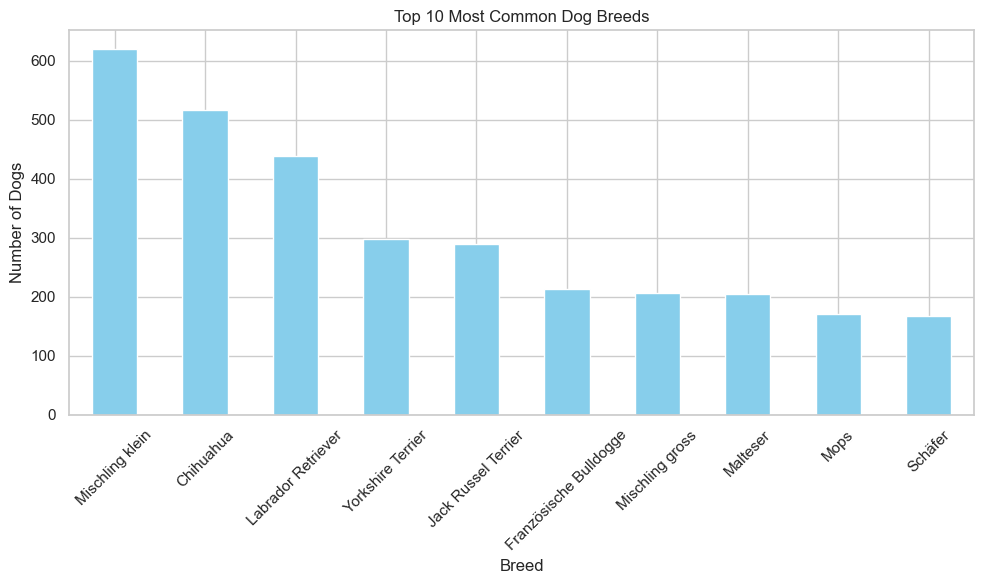

In [59]:
# Most common dog breeds
top_breeds = df["Breed"].value_counts().head(10)
display(top_breeds)

# Bar plot of most common breeds
top_breeds.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Dog Breeds")
plt.xlabel("Breed")
plt.ylabel("Number of Dogs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Breed_Type
K     4339
I     2678
II      17
Name: count, dtype: int64

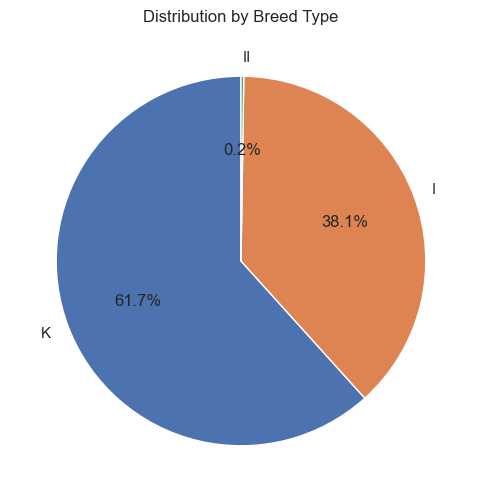

In [60]:
# Distribution by breed type
type_counts = df["Breed_Type"].value_counts()
display(type_counts)

# Pie chart
type_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution by Breed Type")
plt.ylabel("")
plt.show()

GENDER
w    5012
m    2227
Name: count, dtype: int64

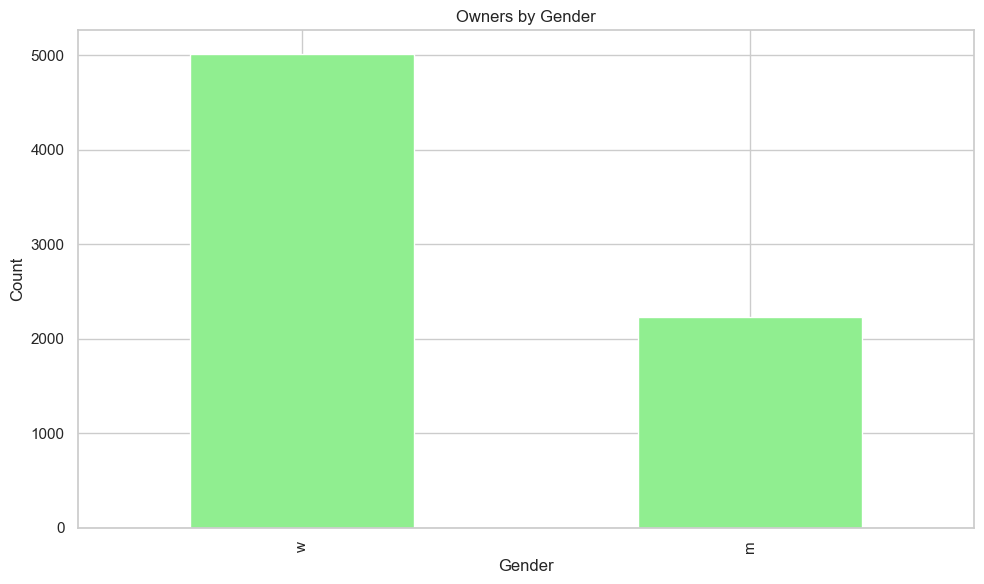

In [61]:
# Distribution by owner gender
gender_counts = df["GENDER"].value_counts()
display(gender_counts)

gender_counts.plot(kind="bar", color="lightgreen")
plt.title("Owners by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Average age of dogs: 15.21


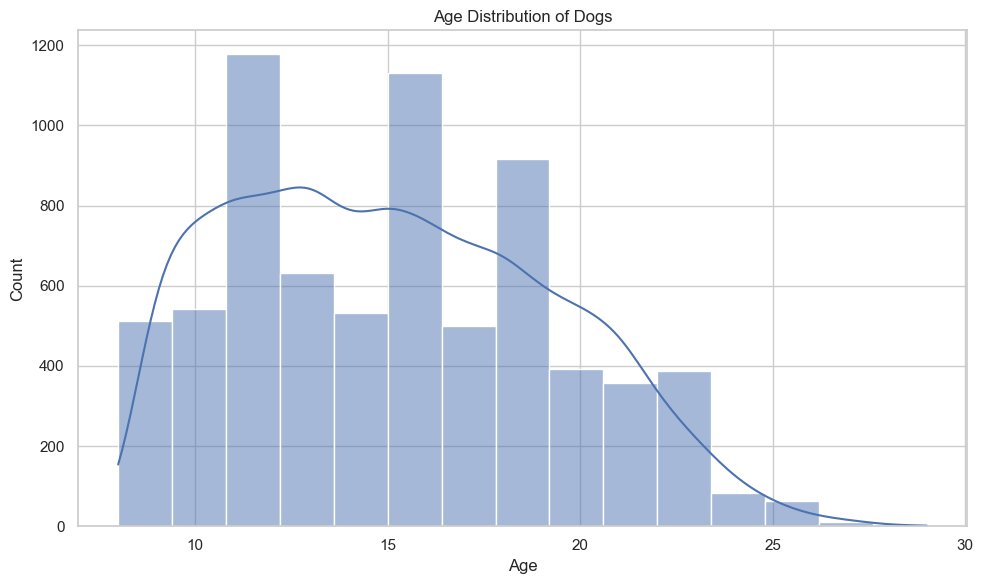

In [62]:
#  Average age of dogs
df["DOG_AGE"] = 2025 - df["DOG_YEAR_OF_BIRTH"]
mean_age = df["DOG_AGE"].mean()
print("Average age of dogs:", round(mean_age, 2))

# Histogram of dog ages
sns.histplot(df["DOG_AGE"].dropna(), bins=15, kde=True)
plt.title("Age Distribution of Dogs")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

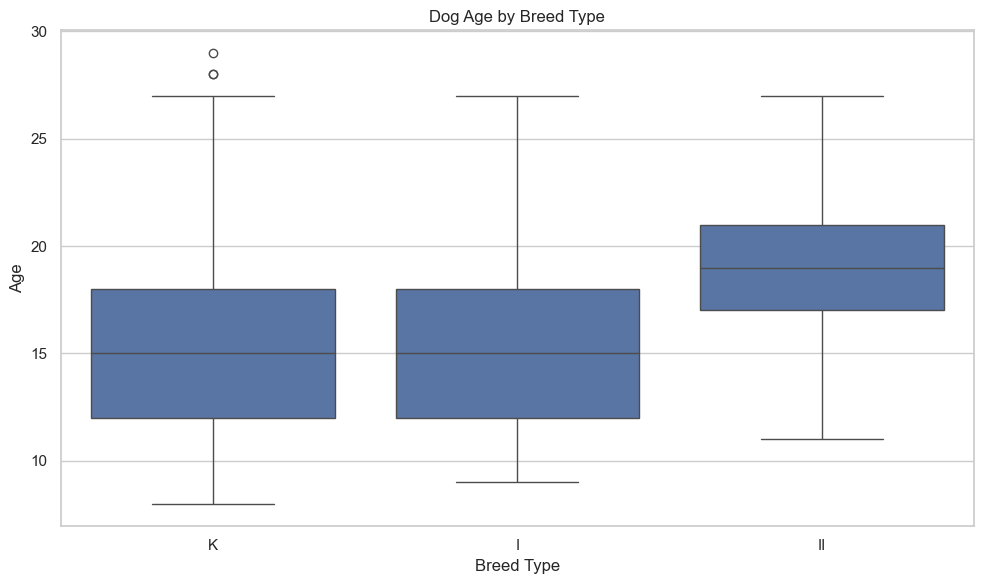

In [63]:
#   Relationship between dog age and breed type
sns.boxplot(
    x="Breed_Type",
    y="DOG_AGE",
    data=df
)
plt.title("Dog Age by Breed Type")
plt.xlabel("Breed Type")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

GENDER,m,w
Breed,,
Affenpinscher,1,0
Afghane,2,4
Afghanischer Windhund,0,3
Airedale Terrier,5,12
Akita Inu,0,5


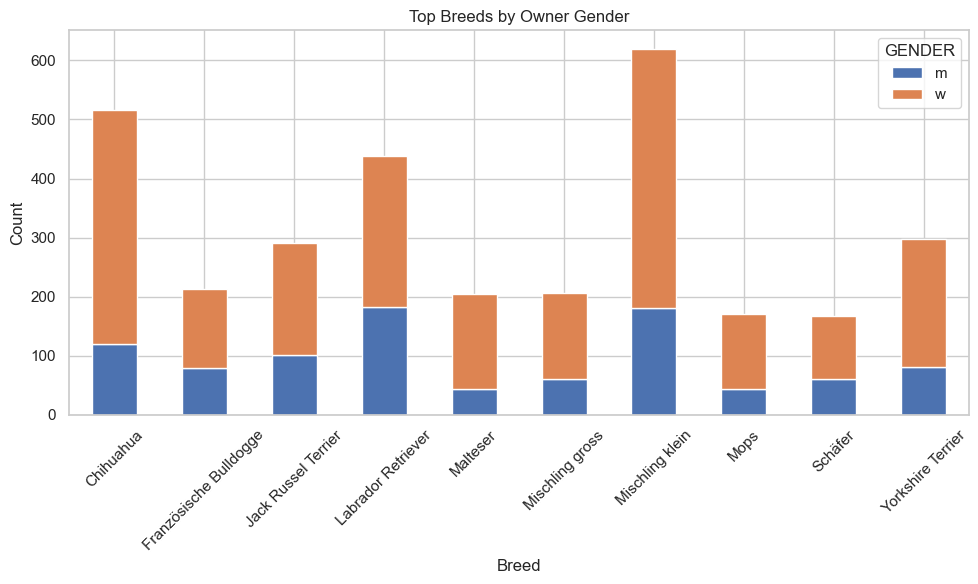

In [64]:

#   Breed by owner gender
breed_gender_crosstab = pd.crosstab(df["Breed"], df["GENDER"])
display(breed_gender_crosstab.head())

top_breed_names = top_breeds.index.tolist()
subset = df[df["Breed"].isin(top_breed_names)]
crosstab_top = pd.crosstab(subset["Breed"], subset["GENDER"])
crosstab_top.plot(kind="bar", stacked=True)
plt.title("Top Breeds by Owner Gender")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

GENDER
m    15.235743
w    15.202314
Name: DOG_AGE, dtype: float64

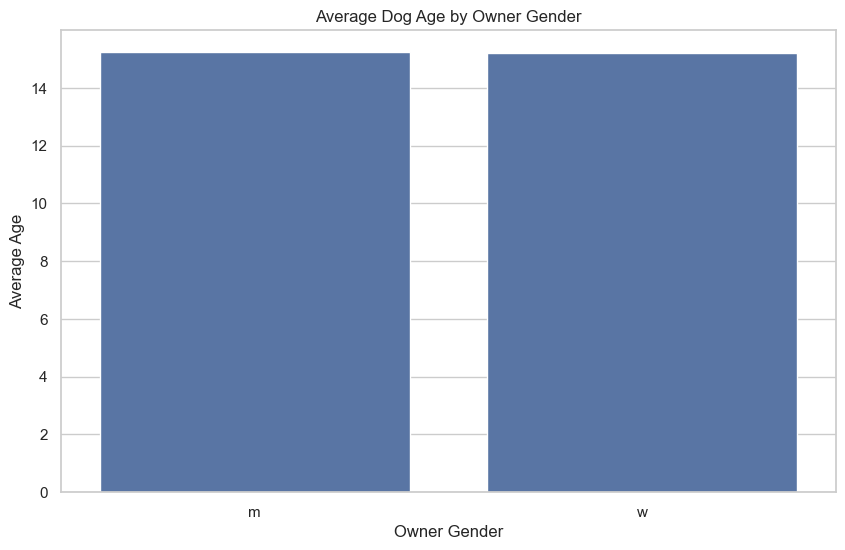

In [65]:
age_gender = df.groupby("GENDER")["DOG_AGE"].mean()
display(age_gender)

sns.barplot(x=age_gender.index, y=age_gender.values)
plt.title("Average Dog Age by Owner Gender")
plt.ylabel("Average Age")
plt.xlabel("Owner Gender")
plt.show()


Breed_Category
Kleinwüchsig           4339
Rassentypenliste I     2678
Rassentypenliste II      17
Name: count, dtype: int64

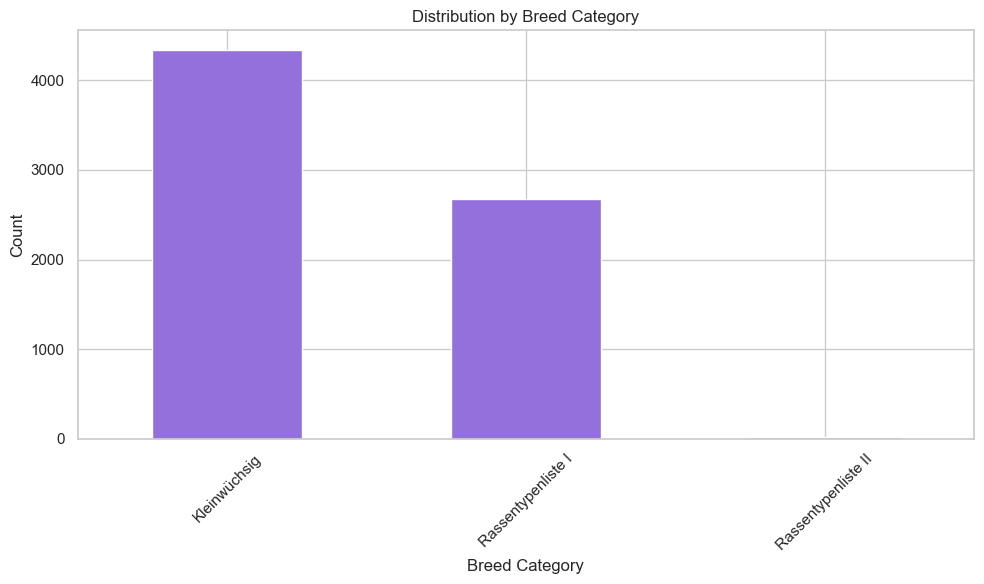

In [66]:
category_counts = df["Breed_Category"].value_counts()
display(category_counts)

category_counts.plot(kind="bar", color="mediumpurple")
plt.title("Distribution by Breed Category")
plt.xlabel("Breed Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


DOG_COLOR
schwarz          787
tricolor         702
weiss            594
braun            538
schwarz/weiss    459
schwarz/braun    386
beige            328
braun/weiss      240
weiss/braun      207
black/tan        160
Name: count, dtype: int64

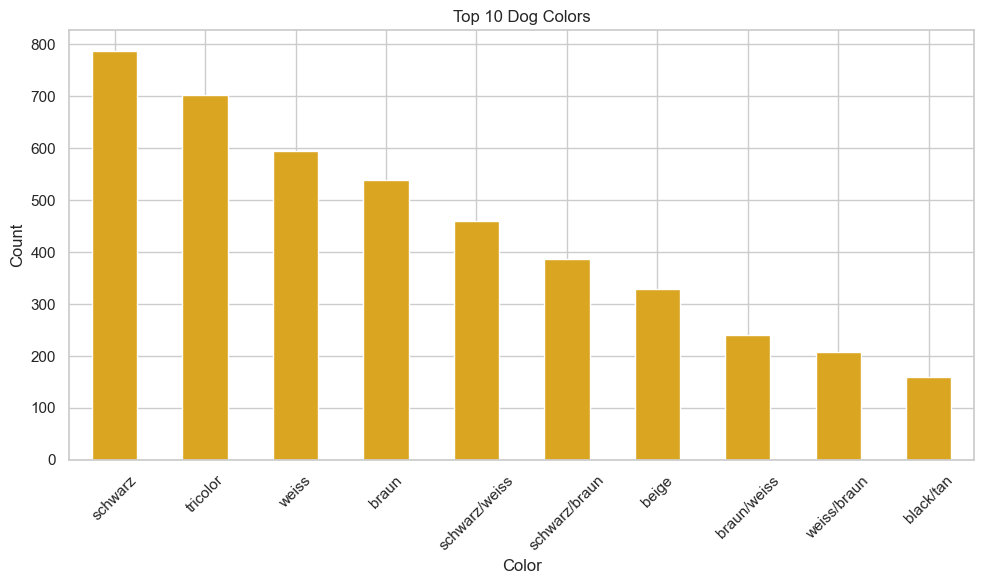

In [67]:
top_colors = df["DOG_COLOR"].value_counts().head(10)
display(top_colors)

top_colors.plot(kind="bar", color="goldenrod")
plt.title("Top 10 Dog Colors")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


count    6448.000000
mean        1.122674
std         0.457596
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
dtype: float64

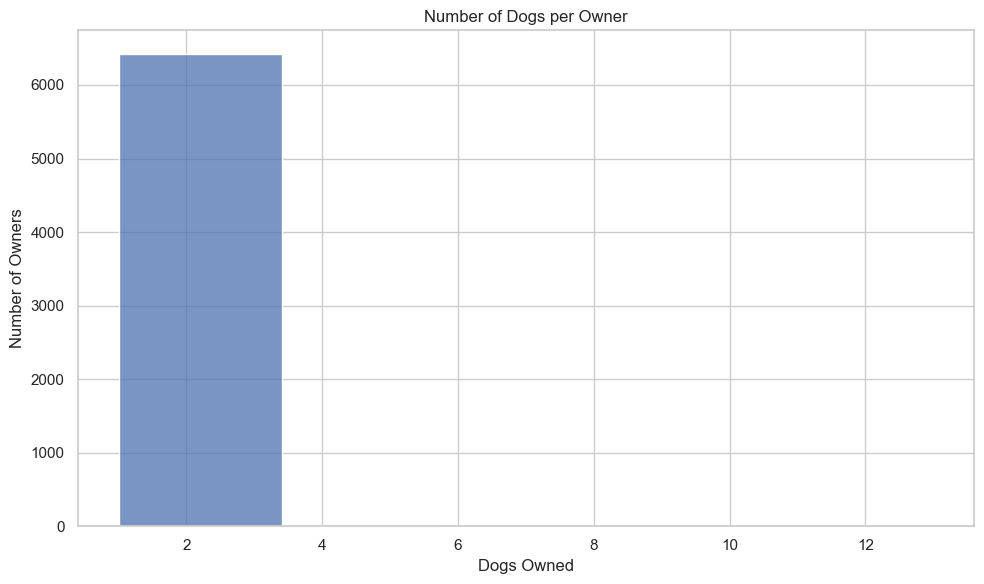

In [68]:
dogs_per_owner = df.groupby("OWNER_ID").size()
display(dogs_per_owner.describe())

sns.histplot(dogs_per_owner, bins=5)
plt.title("Number of Dogs per Owner")
plt.xlabel("Dogs Owned")
plt.ylabel("Number of Owners")
plt.tight_layout()
plt.show()


GENDER
m    15.235743
w    15.202314
Name: DOG_AGE, dtype: float64

C:\Users\daniela.rocha\AppData\Local\Temp\ipykernel_12020\1067849630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_age_gender.index, y=avg_age_gender.values, palette="Set2")


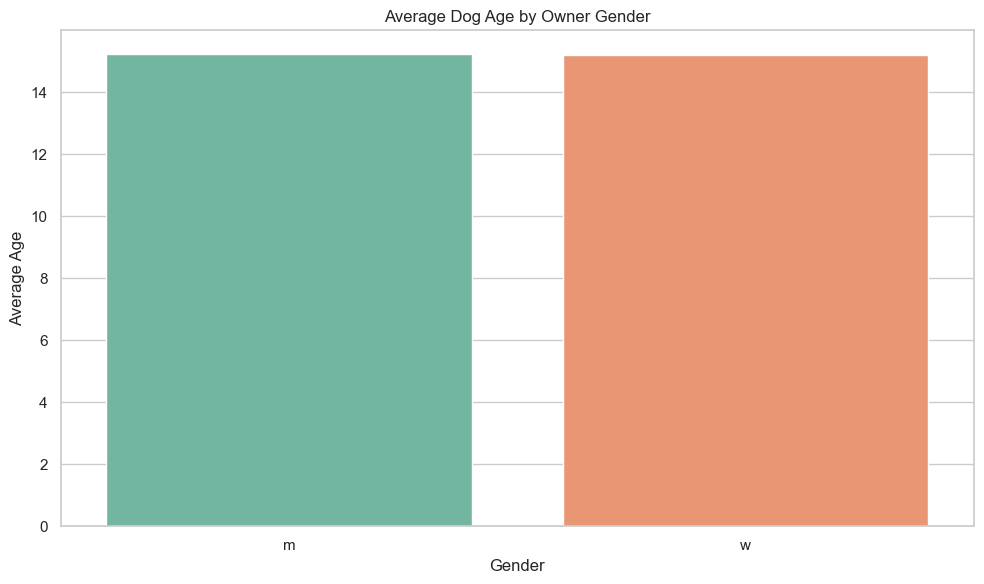

In [69]:
avg_age_gender = df.groupby("GENDER")["DOG_AGE"].mean()
display(avg_age_gender)

sns.barplot(x=avg_age_gender.index, y=avg_age_gender.values, palette="Set2")
plt.title("Average Dog Age by Owner Gender")
plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.tight_layout()
plt.show()
